In [1]:
print('ok')

ok


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [3]:
train_path = 'train'
valid_path = 'test'

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D

In [6]:
folders = glob('train/*')
folders

['train\\apples', 'train\\tomatoes']

In [7]:
num_of_class = len(folders)
num_of_class

2

In [8]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

c:\Users\mdabd\anaconda3\envs\cvdev\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# view the structure of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,177,281 (42.64 MB)

 Trainable params: 11,177,281 (42.64 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 294 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 97 images belonging to 2 classes.


In [15]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\Users\mdabd\anaconda3\envs\cvdev\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.5499 - loss: 2.1422

c:\Users\mdabd\anaconda3\envs\cvdev\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 744ms/step - accuracy: 0.5068 - loss: 1.4532 - val_accuracy: 0.5464 - val_loss: 0.6857
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 532ms/step - accuracy: 0.5578 - loss: 0.6943 - val_accuracy: 0.5567 - val_loss: 0.6780
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 549ms/step - accuracy: 0.5544 - loss: 0.6852 - val_accuracy: 0.5567 - val_loss: 0.6731
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 632ms/step - accuracy: 0.5748 - loss: 0.6662 - val_accuracy: 0.4433 - val_loss: 0.7197
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 557ms/step - accuracy: 0.4830 - loss: 0.6928 - val_accuracy: 0.6082 - val_loss: 0.6507
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 523ms/step - accuracy: 0.5782 - loss: 0.6750 - val_accuracy: 0.5670 - val_loss: 0.6702
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 533ms/step - accuracy: 0.5986 - loss: 0.6617 - val_accuracy: 0.6804 - val_loss: 0.6539
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 529ms/step - accuracy: 0.6395 - loss: 0.6331 - val_accuracy: 0.6907 - val_

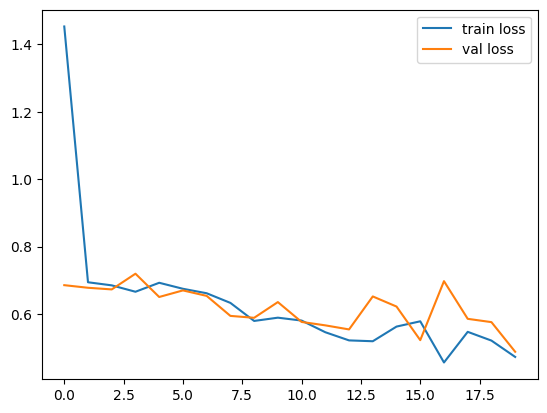

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

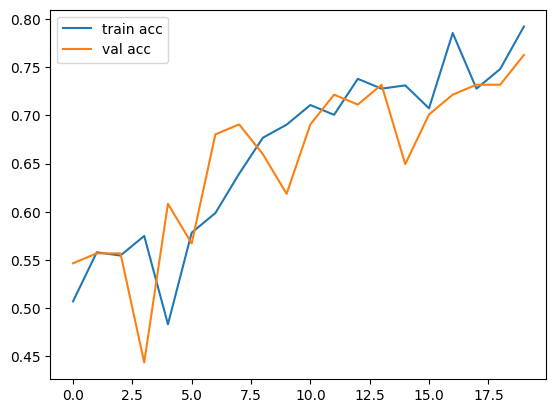

<Figure size 640x480 with 0 Axes>

In [17]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
model.evaluate(test_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7629 - loss: 0.4881 


[0.48810771107673645, 0.7628865838050842]

In [19]:
model.save('model.h5')

In [20]:
from tensorflow.keras.models import load_model

In [21]:
model = load_model("model.h5")

In [22]:
from tensorflow.keras.preprocessing import image

In [25]:
img=image.load_img('train/tomatoes/img_p1_10.jpeg',target_size=(224,224))

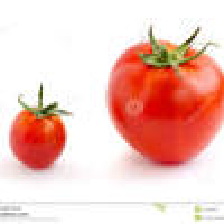

In [26]:
img

In [27]:
import numpy as np

In [28]:
x=image.img_to_array(img)
x=x/255

x=np.expand_dims(x,axis=0)
output = model.predict(x)
print(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[0.6397891]]


In [29]:
x.shape

(1, 224, 224, 3)

In [30]:
output[0][0]

np.float32(0.6397891)

In [31]:
if output[0][0] >=0.5:
    prediction = 'Tomato'
    print(prediction)
else:
    prediction = 'Apple'
    print(prediction)

Tomato


#  Euron